## Use MSE (Mean Squared Error), RMSE (Root MSE), or MAE (Mean Absolute Error) to measure the accuracy of a simple linear regression algorithm

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [59]:
boston = datasets.load_boston()

In [60]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [61]:
x = boston.data[:, 5]  # choose 1 feature (number of rooms) to test
y = boston.target
x.shape, y.shape

((506,), (506,))

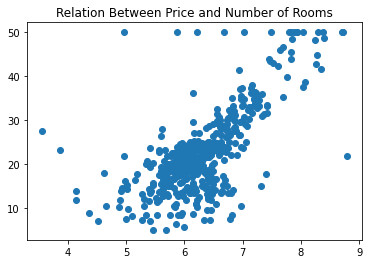

In [62]:
plt.scatter(x, y)
plt.title("Relation Between Price and Number of Rooms")
plt.show()

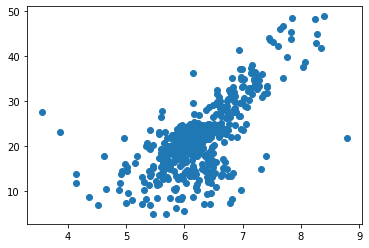

In [63]:
# Note that points whose y = 50 may be cause by a upper limit during data collection. To get a more accurate result
# , these boundry points are removed
x = x[y < 50.0]
y = y[y < 50.0]
plt.scatter(x, y)
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 600)
x_train.shape, x_test.shape

((367,), (123,))

In [82]:
%run /Users/ada/Documents/coding-workspace/PycharmProjects/fun_machine_learning/linear_regression_simple.py
reg = LinearRegressionSimple2()
# reg.fit(x_train, y_train)
# reg.a_, reg.b_

ImportError: attempted relative import with no known parent package

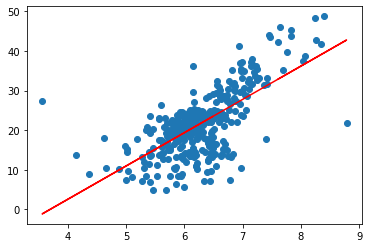

In [66]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [67]:
y_predict = reg.predict(x_test)

## MSE

In [68]:
mse_test = np.sum((y_predict - y_test) ** 2) / len(y_test)
mse_test

28.477935716615963

## RMSE

In [69]:
from math import sqrt
rmse_test = sqrt(mse_test)
rmse_test

5.336472216419379

## MAE

In [70]:
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
mae_test

3.6829203267259816

In [71]:
# Extract 3 methods of measuring accuracy to metrics.py
%run /Users/ada/Documents/coding-workspace/PycharmProjects/fun_machine_learning/metrics.py

In [72]:
mean_squared_error(y_test, y_predict)

28.477935716615963

In [73]:
root_mean_squared_error(y_test, y_predict)

5.336472216419379

In [74]:
mean_absolute_error(y_test, y_predict)

3.6829203267259816

In [75]:
# Use MSE and MAE in scikit-learn

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_squared_error(y_test, y_predict), mean_absolute_error(y_test, y_predict)

(28.477935716615963, 3.6829203267259816)

# R squared 
## Core idea: compare our model with the baseline model (y_mean)
## 1 - residual sum of quares / total sum of squares = 1 - MSE / var

In [77]:
1 - mean_squared_error(y_test, y_predict) / np.var(y_test)

0.48732663325241377

In [78]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.48732663325241377